##  1. importing modules and data

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('churn_data.csv')

In [4]:
df

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,24291,1,24.0,R,580.0,0,0,0,0,0,...,0,0,0,0,Leo,0,0,32.0,1.07,1
26996,4116,1,26.0,na,NaN,0,0,2,0,0,...,0,0,0,1,Cancer,1,0,2.0,0.67,0
26997,23740,0,22.0,na,NaN,0,0,37,0,0,...,0,0,0,0,Taurus,0,0,28.0,0.93,0
26998,47663,1,46.0,na,529.0,2,0,16,2,0,...,0,0,0,0,Aries,1,0,27.0,0.90,1


In [5]:
for col in df.columns:
    print(col, str(round(100 * df[col].isnull().sum() / len(df), 2)) + '%')

user 0.0%
churn 0.0%
age 0.01%
housing 0.0%
credit_score 29.74%
deposits 0.0%
withdrawal 0.0%
purchases_partners 0.0%
purchases 0.0%
cc_taken 0.0%
cc_recommended 0.0%
cc_disliked 0.0%
cc_liked 0.0%
cc_application_begin 0.0%
app_downloaded 0.0%
web_user 0.0%
app_web_user 0.0%
ios_user 0.0%
android_user 0.0%
registered_phones 0.0%
payment_type 0.0%
waiting_4_loan 0.0%
cancelled_loan 0.0%
received_loan 0.0%
rejected_loan 0.0%
zodiac_sign 0.0%
left_for_two_month_plus 0.0%
left_for_one_month 0.0%
rewards_earned 11.95%
reward_rate 0.0%
is_referred 0.0%


In [6]:
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


## 2. data cleaning

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

user                       0
churn                      0
age                        0
housing                    0
credit_score               0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
rewards_earned             0
reward_rate                0
is_referred                0
dtype: int64

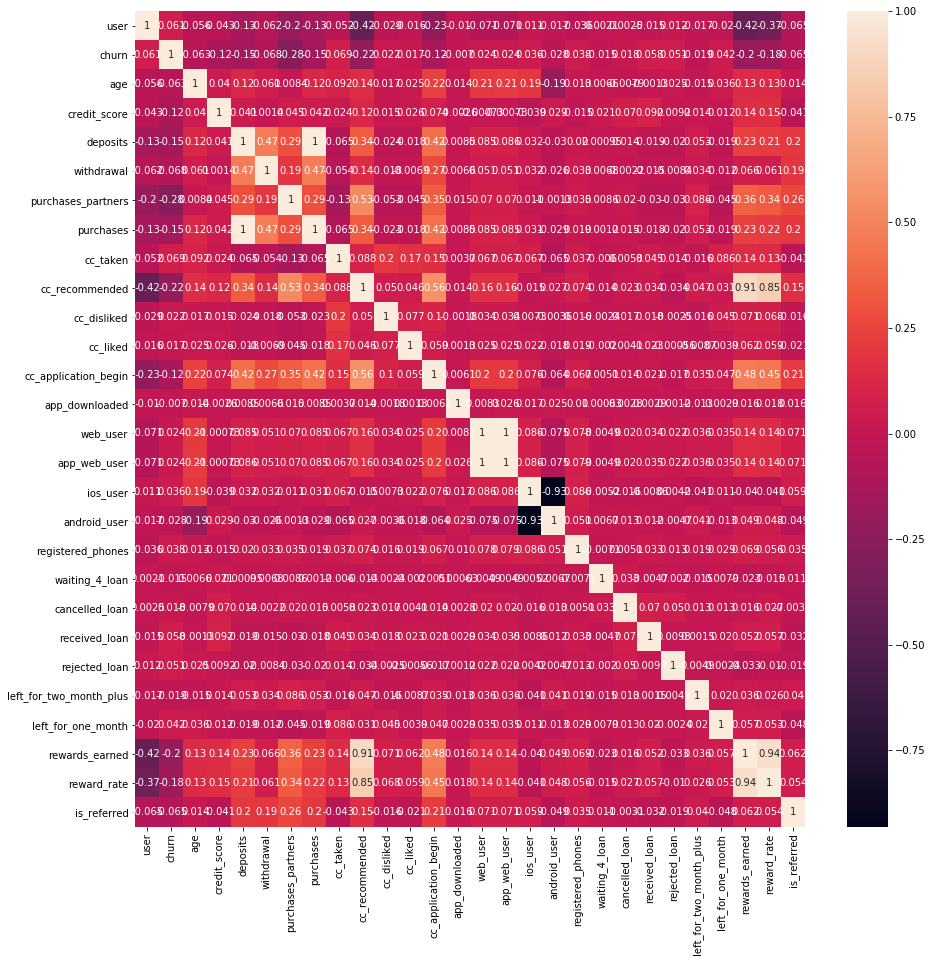

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

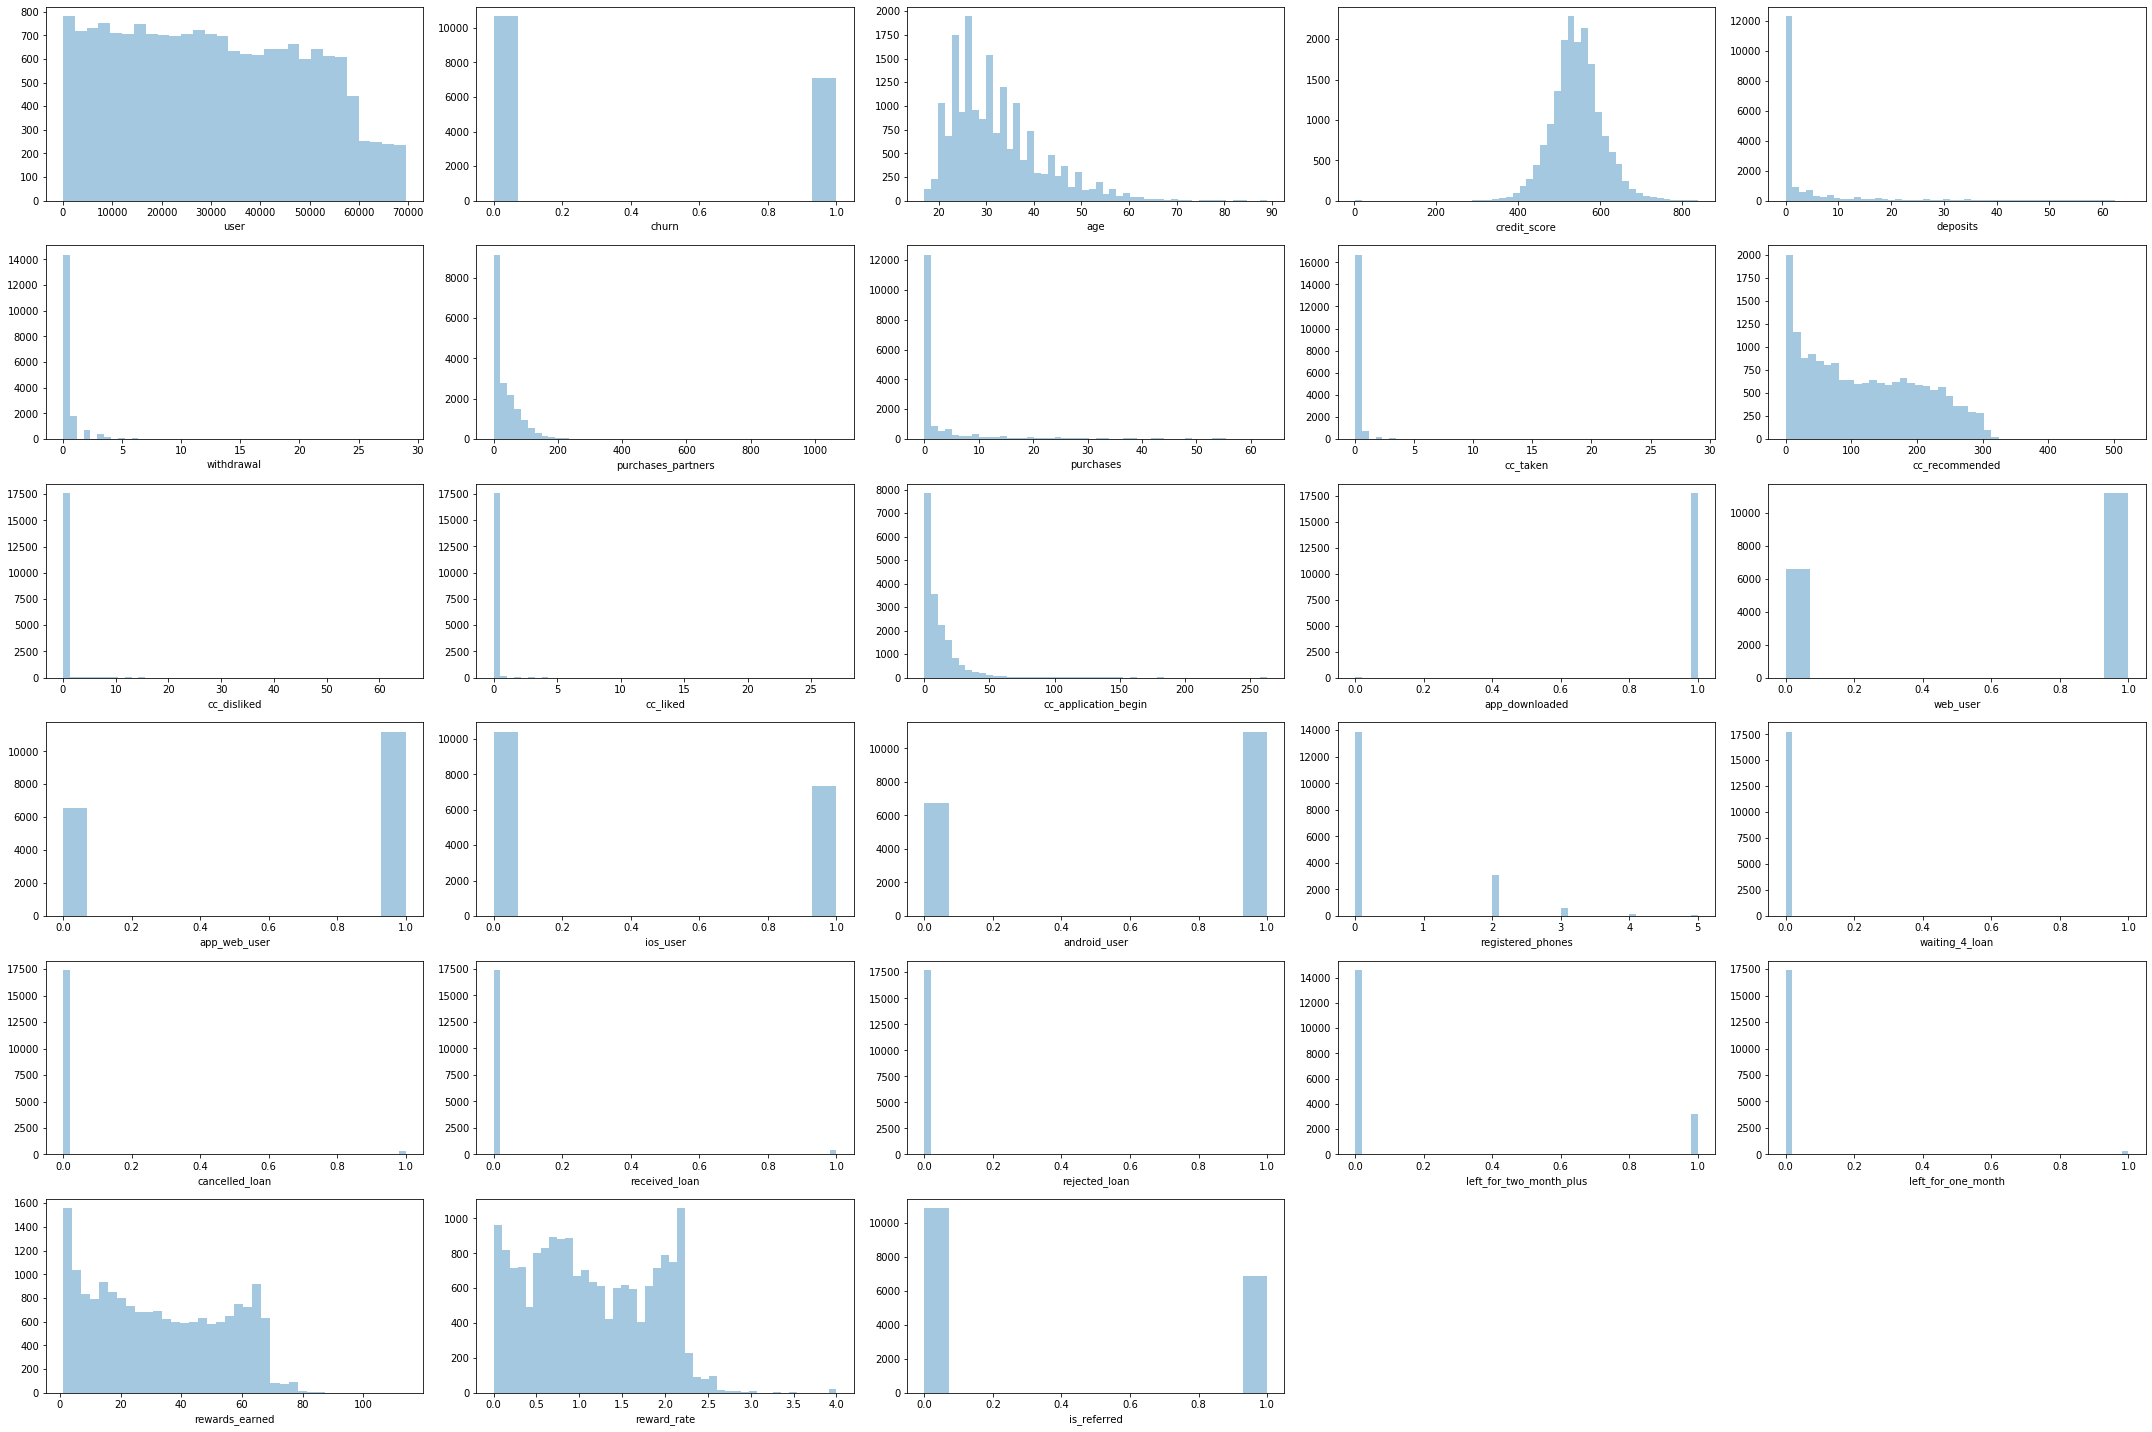

In [10]:
num_cols = df.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(30,20))

for col in range(len(num_cols.columns)):
    fig.add_subplot(6,5,col+1)
    sns.distplot(num_cols.iloc[:,col], kde=False)
    plt.xlabel(num_cols.columns[col])

plt.tight_layout()


In [13]:
df3=df.drop(['user','housing','payment_type','zodiac_sign'], axis=1)

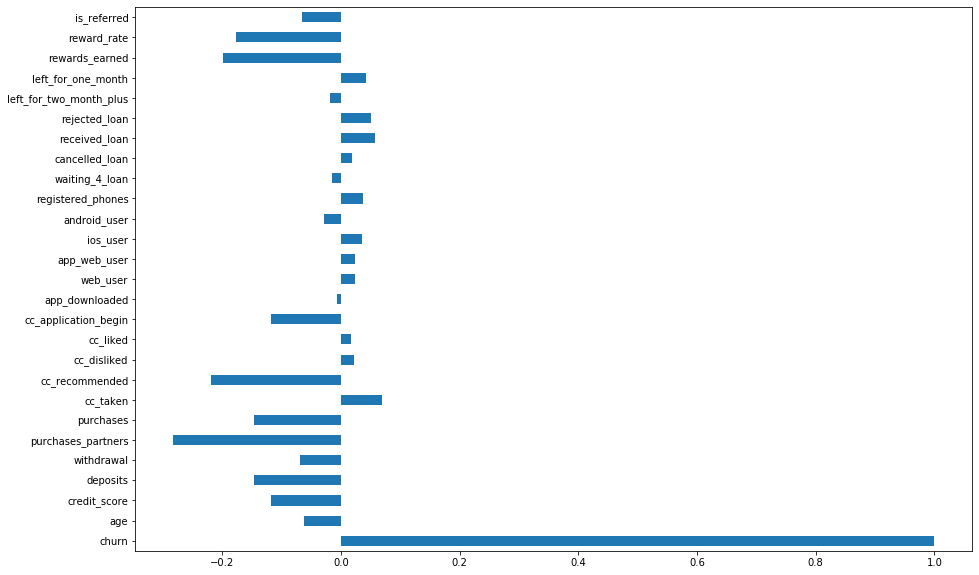

In [43]:
fig = plt.figure(figsize=(15,10))
df3.corrwith(df.churn).plot(kind='barh')
#Ploting the correalations of the features with the target 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17779 entries, 1 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     17779 non-null  int64  
 1   churn                    17779 non-null  int64  
 2   age                      17779 non-null  float64
 3   housing                  17779 non-null  object 
 4   credit_score             17779 non-null  float64
 5   deposits                 17779 non-null  int64  
 6   withdrawal               17779 non-null  int64  
 7   purchases_partners       17779 non-null  int64  
 8   purchases                17779 non-null  int64  
 9   cc_taken                 17779 non-null  int64  
 10  cc_recommended           17779 non-null  int64  
 11  cc_disliked              17779 non-null  int64  
 12  cc_liked                 17779 non-null  int64  
 13  cc_application_begin     17779 non-null  int64  
 14  app_downloaded        

In [60]:
df=df.drop(['user'], axis=1)

In [61]:
df.select_dtypes(include=['object'])

,housing,payment_type,zodiac_sign
1,R,Weekly,Leo
2,R,Semi-Monthly,Capricorn
3,R,Bi-Weekly,Capricorn
5,R,Bi-Weekly,Taurus
6,na,Bi-Weekly,Cancer
...,...,...,...
26993,na,Bi-Weekly,Scorpio
26994,R,Monthly,Virgo
26995,R,Weekly,Leo
26998,na,Semi-Monthly,Aries


In [62]:

dfhot=pd.get_dummies(data=df, columns=['housing', 'payment_type','zodiac_sign'])


In [63]:
dfhot.head()

,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
1,0,28.0,486.0,0,0,1,0,0,96,0,...,0,0,1,0,0,0,0,0,0,0
2,0,35.0,561.0,47,2,86,47,0,285,0,...,1,0,0,0,0,0,0,0,0,0
3,0,26.0,567.0,26,3,38,25,0,74,0,...,1,0,0,0,0,0,0,0,0,0
5,1,32.0,567.0,5,3,111,5,0,227,0,...,0,0,0,0,0,0,0,1,0,0
6,0,21.0,475.0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.model_selection import train_test_split

In [88]:
X=dfhot.drop(['churn'],axis=1)
y=dfhot.churn


In [122]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [123]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.20, random_state=42) 

In [124]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix,classification_report

In [126]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[1786,  385],
       [ 753,  632]])

In [127]:
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.70      0.82      0.76      2171
           1       0.62      0.46      0.53      1385

    accuracy                           0.68      3556
   macro avg       0.66      0.64      0.64      3556
weighted avg       0.67      0.68      0.67      3556



In [129]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train,
                             y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.663 (+/- 0.020)


In [130]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [131]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
abc_clf = AdaBoostClassifier()
nnn_clf = KNeighborsClassifier()
gbc_clf=GradientBoostingClassifier()
xgb_clf=XGBClassifier()

In [132]:
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('abc', abc_clf), ('nnn', nnn_clf),('gbc', gbc_clf),('xgb', xgb_clf) ],
voting='hard'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

LogisticRegression               precision    recall  f1-score   support

           0       0.70      0.82      0.76      2171
           1       0.62      0.46      0.53      1385

    accuracy                           0.68      3556
   macro avg       0.66      0.64      0.64      3556
weighted avg       0.67      0.68      0.67      3556

RandomForestClassifier               precision    recall  f1-score   support

           0       0.76      0.86      0.81      2171
           1       0.73      0.58      0.65      1385

    accuracy                           0.75      3556
   macro avg       0.75      0.72      0.73      3556
weighted avg       0.75      0.75      0.75      3556

VotingClassifier               precision    recall  f1-score   support

           0       0.74      0.89      0.81      2171
           1       0.74      0.51      0.60      1385

    accuracy                           0.74      3556
   macro avg       0.74      0.70      0.70      3556
weighted avg   

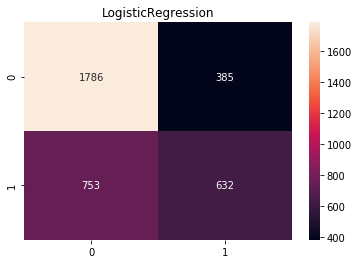

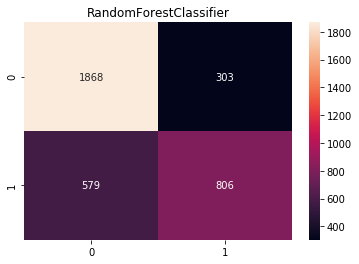

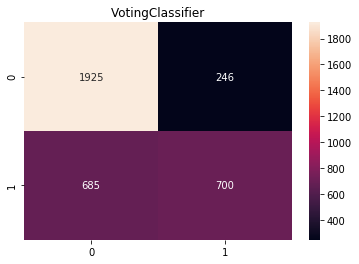

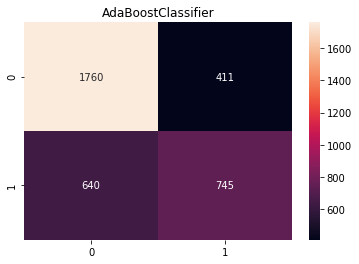

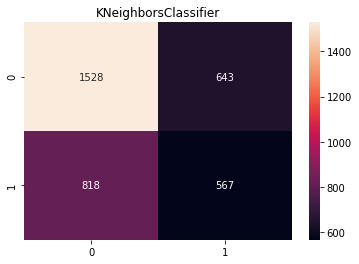

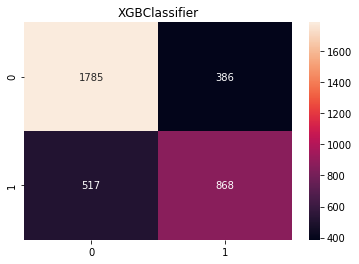

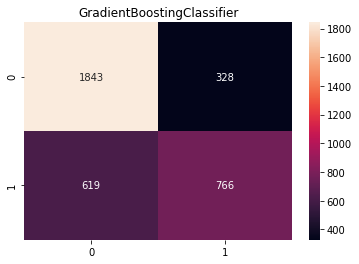

In [133]:
for clf in (log_clf, rnd_clf,  voting_clf,abc_clf, nnn_clf,xgb_clf,gbc_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    plt.figure()
    plt.title(clf.__class__.__name__)
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,label=clf.__class__.__name__,fmt='d')
    print(clf.__class__.__name__,classification_report(y_test, y_pred))

## our model has provided us with an indication of users which are likely to churn. and the best model here is the XGBClassifier and RandomForestClassifier with the model turning the model can still perform better and tryiny out the performace with  tensorflow-kares